 ## Libraries

In [1]:
# import working with data libraries
import pandas as pd
import numpy as np

# import seaborn
import seaborn as sns

# import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (17, 5)

import patsy
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import ttest_ind

In [2]:
# read in csv 
library_17 = pd.read_csv('./data/All-DataFY16-17.csv',  encoding='latin-1')

# select only columns we are interested in 
lib_var = ['County', 'Population of The Legal Service Area', 
        'Registered Users as of June 30', 'Children Borrowers', 
        'Library Visits', 'Total Operating Income', 'Circulation of Childrens Materials',
        "# of Children's Programs", "Children's Program Attendance"]
library_17 = library_17[lib_var]

# convert quantitative variables to floats 
library_17[lib_var[1:]] = library_17[lib_var[1:]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype(np.float64)
library_17['Year'] = 2017

# do the same with other years
library_18 = pd.read_csv('./data/All-DataFY17-18.csv',  encoding='latin-1')
library_18 = library_18[lib_var]
library_18[lib_var[1:]] = library_18[lib_var[1:]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype(np.float64)
library_18['Year'] = 2018

library_19 = pd.read_csv('./data/All-DataFY18-19.csv',  encoding='latin-1')
library_19 = library_19[lib_var]
library_19[lib_var[1:]] = library_19[lib_var[1:]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype(np.float64)
library_19['Year'] = 2019

# since CAASPP is missing 2020 data, we cannot compare it with 2020 library data

library_21 = pd.read_csv('./data/All-DataFY20-21.csv',  encoding='latin-1')
# column names differ slightly from previous years, manually adjusted
library_21 = library_21[['1.35 County', '2.1 Population of The Legal Service Area', 
        '2.2 Registered Users as of June 30', '2.3 Children Borrowers', '7.2 Library Visits', 
        '3.5 Total Operating Income', '7.12 Circulation of Childrens Materials', 
        "# of Children's Programs (calculated)", "Children's Program Attendance"]]
# rename columns 
library_21.columns = lib_var
library_21[lib_var[1:]] = library_21[lib_var[1:]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype(np.float64)
library_21['Year'] = 2021

library_22 = pd.read_csv('./data/All-DataFY21-22.csv',  encoding='latin-1')
library_22 = library_22[['1.36 County', '2.1 Population of The Legal Service Area', 
        '2.2 Registered Users as of June 30', '2.3 Children Borrowers', '7.2 Library Visits', 
        '3.5 Total Operating Income', "7.11 Circulation of Children's Materials", 
        "# of Children's Programs (calculated)", "Children's Program Attendance"]]
library_22.columns = lib_var
library_22[lib_var[1:]] = library_22[lib_var[1:]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype(np.float64)
library_22['Year'] = 2022


libraries = pd.concat([library_17, library_18, library_19, library_21, library_22])

In [3]:
# combine all rows in the same county
new_libraries = libraries.groupby(['County','Year']).aggregate('sum').reset_index()

# see what aggregated library dataset looks like
new_libraries

,County,Year,Population of The Legal Service Area,Registered Users as of June 30,Children Borrowers,Library Visits,Total Operating Income,Circulation of Childrens Materials,# of Children's Programs,Children's Program Attendance
0,Alameda,2017,1645359.0,1144802.0,211353.0,7943160.0,100332971.0,6808663.0,14923.0,494780.0
1,Alameda,2018,1660202.0,1166499.0,212589.0,7701703.0,107204293.0,6769157.0,14790.0,504045.0
2,Alameda,2019,1669301.0,1207722.0,233130.0,7663199.0,120455980.0,7223460.0,13432.0,477303.0
3,Alameda,2021,1656591.0,1274668.0,193807.0,321287.0,129778074.0,3394211.0,1217.0,33399.0
4,Alameda,2022,1651979.0,1201528.0,183693.0,3379739.0,136050987.0,6686492.0,5678.0,106002.0
...,...,...,...,...,...,...,...,...,...,...
280,Yuba,2017,74577.0,37350.0,5573.0,54647.0,410172.0,38717.0,477.0,4032.0
281,Yuba,2018,74727.0,36651.0,2690.0,59033.0,506932.0,21688.0,489.0,4891.0
282,Yuba,2019,77916.0,37978.0,2578.0,58208.0,714484.0,19155.0,354.0,4589.0
283,Yuba,2021,79407.0,37795.0,1835.0,-1.0,843125.0,4354.0,145.0,7735.0


## CAASPP

In [4]:
# read in score csv
caaspp_17 = pd.read_csv('./data/sb_ca2017_1_csv_v2.csv')

#select only variables we are interested in
ca_var = ['County Code', 'Test Year', 'Grade', 'Test Id', 'Mean Scale Score', 
          'Percentage Standard Exceeded', 'Percentage Standard Met', 'Percentage Standard Nearly Met', 
          'Percentage Standard Not Met']

# exclude all observations of Grade 11 and Grade 13 (all grades totals) 
# exclude all observations of County Code 0 (whole state total)
# select only District Code = 0 (individual county totals)
caaspp_17 = caaspp_17.loc[(caaspp_17['Grade'] < 11) & (caaspp_17['County Code'] != 0) & (caaspp_17['District Code'] == 0), ca_var]

#split the data based on the two types of tests, ELA and Math
caaspp_17_test2 = caaspp_17[caaspp_17['Test Id'] == 2]
merge_var = ['County Code', 'Test Year', 'Grade', 'Test Id 2', 'Mean Scale Score 2', 
          'Percentage Standard Exceeded 2', 'Percentage Standard Met 2', 'Percentage Standard Nearly Met 2', 
          'Percentage Standard Not Met 2']
caaspp_17_test2.columns = merge_var

# now each county has grades 3-8, two rows per grade for ELA and math
caaspp_17 = caaspp_17[caaspp_17['Test Id'] == 1].merge(caaspp_17_test2)

#allow python to reallocate the memory
del caaspp_17_test2

caaspp_17.head()

,County Code,Test Year,Grade,Test Id,Mean Scale Score,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Test Id 2,Mean Scale Score 2,Percentage Standard Exceeded 2,Percentage Standard Met 2,Percentage Standard Nearly Met 2,Percentage Standard Not Met 2
0,1,2017,3,1,2426.9,28.95,20.40,21.25,29.39,2,2443.8,27.97,25.67,21.76,24.59
1,1,2017,4,1,2469.9,29.72,21.00,17.59,31.69,2,2480.3,25.72,23.58,25.98,24.72
2,1,2017,5,1,2506.1,27.50,25.95,17.28,29.28,2,2508.8,28.88,15.92,22.50,32.69
3,1,2017,6,1,2534.9,23.51,30.07,22.62,23.80,2,2531.7,27.52,18.38,24.05,30.05
4,1,2017,7,1,2561.2,24.26,32.75,19.36,23.63,2,2555.6,29.37,19.54,22.14,28.96


In [5]:
caaspp_18 = pd.read_csv('./data/sb_ca2018_1_csv_v3.csv')
caaspp_18 = caaspp_18.loc[(caaspp_18['Grade'] < 11) & (caaspp_18['County Code'] != 0) & (caaspp_18['District Code'] == 0), ca_var]
caaspp_18_test2 = caaspp_18[caaspp_18['Test Id'] == 2]
caaspp_18_test2.columns = merge_var
caaspp_18 = caaspp_18[caaspp_18['Test Id'] == 1].merge(caaspp_18_test2)
del caaspp_18_test2

caaspp_19 = pd.read_csv('./data/sb_ca2019_1_csv_v4.csv')
caaspp_19 = caaspp_19.loc[(caaspp_19['Grade'] < 11) & (caaspp_19['County Code'] != 0) & (caaspp_19['District Code'] == 0), ca_var]
caaspp_19_test2 = caaspp_19[caaspp_19['Test Id'] == 2]
caaspp_19_test2.columns = merge_var
caaspp_19 = caaspp_19[caaspp_19['Test Id'] == 1].merge(caaspp_19_test2)
del caaspp_19_test2

caaspp_21 = pd.read_csv('./data/sb_ca2021_1_csv_v2.csv', delimiter='^')
#They capitalized the 'D' in 'Test ID'
ca_var2 = ['County Code', 'Test Year', 'Grade', 'Test ID', 'Mean Scale Score', 
          'Percentage Standard Exceeded', 'Percentage Standard Met', 'Percentage Standard Nearly Met', 
          'Percentage Standard Not Met']
caaspp_21 = caaspp_21.loc[(caaspp_21['Grade'] < 11) & (caaspp_21['County Code'] != 0) & (caaspp_21['District Code'] == 0), ca_var2]
caaspp_21.columns = ca_var
caaspp_21_test2 = caaspp_21[caaspp_21['Test Id'] == 2]
caaspp_21_test2.columns = merge_var
caaspp_21 = caaspp_21[caaspp_21['Test Id'] == 1].merge(caaspp_21_test2)
del caaspp_21_test2

caaspp_22 = pd.read_csv('./data/sb_ca2022_1_csv_v1.csv', delimiter='^')
caaspp_22 = caaspp_22.loc[(caaspp_22['Grade'] < 11) & (caaspp_22['County Code'] != 0) & (caaspp_22['District Code'] == 0), ca_var2]
caaspp_22.columns = ca_var
caaspp_22_test2 = caaspp_22[caaspp_22['Test Id'] == 2]
caaspp_22_test2.columns = merge_var
caaspp_22 = caaspp_22[caaspp_22['Test Id'] == 1].merge(caaspp_22_test2)
del caaspp_22_test2

In [6]:
#2021 has null values, the others don't
caaspp_21[caaspp_21.isna().any(axis=1)]

,County Code,Test Year,Grade,Test Id,Mean Scale Score,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Test Id 2,Mean Scale Score 2,Percentage Standard Exceeded 2,Percentage Standard Met 2,Percentage Standard Nearly Met 2,Percentage Standard Not Met 2
270,46,2021,3,1,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN
271,46,2021,4,1,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN
272,46,2021,5,1,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN
273,46,2021,6,1,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN


In [7]:
#Append all years together
caaspp = pd.concat([caaspp_17, caaspp_18, caaspp_19, caaspp_21, caaspp_22], ignore_index=True)
del caaspp_17, caaspp_18, caaspp_19, caaspp_21, caaspp_22

In [8]:
caaspp[caaspp.isna().any(axis=1)]

,County Code,Test Year,Grade,Test Id,Mean Scale Score,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Test Id 2,Mean Scale Score 2,Percentage Standard Exceeded 2,Percentage Standard Met 2,Percentage Standard Nearly Met 2,Percentage Standard Not Met 2
1314,46,2021,3,1,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN
1315,46,2021,4,1,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN
1316,46,2021,5,1,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN
1317,46,2021,6,1,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN


In [9]:
#The county with the nulls is Sierra. A news search shows that in 2021, the CAASPP was optional in Sierra County
caaspp = caaspp.dropna()

In [10]:
#Look at the values in the data ...we see that some have asterisks
unique_values = caaspp['Mean Scale Score'].unique()
unique_values.sort()
print(unique_values)

['*' '2353.5' '2358.4' ... '2605.9' '2614.2' '2616.5']


In [11]:
#drop rows that have asterisks
asterisk_rows = caaspp[caaspp['Mean Scale Score'] == '*'].index.values
caaspp = caaspp.drop(labels=asterisk_rows)

#Same for mean scale score 2
asterisk_rows = caaspp[caaspp['Mean Scale Score 2'] == '*'].index.values
caaspp = caaspp.drop(labels=asterisk_rows)

In [12]:
# read in school code csv, which matches county codes to county name
county_names = pd.read_csv('./data/sb_ca2017entities_csv.csv')

# drop County Code = 0 (does not represent a county)
county_names = county_names[county_names['County Code'] != 0]

# we only need one row per county for its name
county_names = county_names[county_names['District Code'] == 0]

# select column with county names
county_names = county_names['County Name'].reset_index(drop=True)

# replace the school code column in caaspp with county_names
county_names = county_names.reset_index()
county_names['index'] += 1

mapping = dict(county_names[['index', 'County Name']].values)
caaspp['County Code'] = caaspp['County Code'].map(mapping)
caaspp = caaspp.rename(columns={'County Code': 'County Name'})

#drop sierra bc that county is not included in the library dataset
caaspp = caaspp.drop(caaspp[caaspp['County Name'] == 'Sierra'].index)

caaspp = caaspp.drop('Test Id', axis=1)
caaspp = caaspp.drop('Test Id 2', axis=1)

caaspp.columns = ['County Name', 'Test Year', 'Grade', 'Mean Scale Score ELA', 'Percent Exceeded ELA', 'Percent Met ELA', 
                'Percent Nearly Met ELA', 'Percent Not Met ELA', 'Mean Scale Score Math', 'Percent Exceeded Math', 'Percent Met Math', 
                'Percent Nearly Met Math', 'Percent Not Met Math']

caaspp.head()

,County Name,Test Year,Grade,Mean Scale Score ELA,Percent Exceeded ELA,Percent Met ELA,Percent Nearly Met ELA,Percent Not Met ELA,Mean Scale Score Math,Percent Exceeded Math,Percent Met Math,Percent Nearly Met Math,Percent Not Met Math
0,Alameda,2017,3,2426.9,28.95,20.40,21.25,29.39,2443.8,27.97,25.67,21.76,24.59
1,Alameda,2017,4,2469.9,29.72,21.00,17.59,31.69,2480.3,25.72,23.58,25.98,24.72
2,Alameda,2017,5,2506.1,27.50,25.95,17.28,29.28,2508.8,28.88,15.92,22.50,32.69
3,Alameda,2017,6,2534.9,23.51,30.07,22.62,23.80,2531.7,27.52,18.38,24.05,30.05
4,Alameda,2017,7,2561.2,24.26,32.75,19.36,23.63,2555.6,29.37,19.54,22.14,28.96


In [13]:
# Convert all numeric variables to floats in order to get summary of statistics
caaspp_numeric_vars = ['Mean Scale Score ELA', 'Percent Exceeded ELA', 'Percent Met ELA', 
                       'Percent Nearly Met ELA', 'Percent Not Met ELA', 'Mean Scale Score Math', 
                       'Percent Exceeded Math', 'Percent Met Math', 
                       'Percent Nearly Met Math', 'Percent Not Met Math']

caaspp[caaspp_numeric_vars] = caaspp[caaspp_numeric_vars].astype(np.float64)

caaspp.describe()

,Test Year,Grade,Mean Scale Score ELA,Percent Exceeded ELA,Percent Met ELA,Percent Nearly Met ELA,Percent Not Met ELA,Mean Scale Score Math,Percent Exceeded Math,Percent Met Math,Percent Nearly Met Math,Percent Not Met Math
count,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000
mean,2019.390476,5.498214,2490.457738,16.747494,27.281506,24.511613,31.459220,2481.462202,14.915827,19.366250,28.149798,37.567935
std,1.855701,1.708333,54.142953,7.476501,6.133823,4.143882,8.241774,45.319197,7.776960,5.512322,4.667914,10.364839
min,2017.000000,3.000000,2353.500000,0.000000,0.000000,11.110000,0.000000,2365.600000,0.000000,4.000000,14.380000,7.140000
25%,2018.000000,4.000000,2448.275000,11.077500,22.280000,21.540000,25.930000,2451.100000,9.287500,15.560000,24.990000,29.807500
50%,2019.000000,5.000000,2497.100000,15.280000,27.310000,24.460000,31.310000,2482.600000,13.140000,18.460000,27.955000,37.610000
75%,2021.000000,7.000000,2533.775000,21.192500,31.752500,27.340000,36.700000,2512.700000,18.290000,23.402500,30.992500,44.992500
max,2022.000000,8.000000,2616.500000,43.660000,50.000000,44.440000,59.050000,2628.100000,48.280000,38.610000,55.000000,71.160000


## California Population

In [14]:
# read in csv for population estimates 2010-2019
pop_17_19 = pd.read_csv('./data/cc-est2019-agesex-06.csv')

# select years 2017, 2018, 2019
pop_17_19 = pop_17_19[pop_17_19['YEAR'] > 9]

# select columns county name, year, and population ages 5-13
pop_17_19 = pop_17_19[['CTYNAME', 'YEAR', 'AGE513_TOT']]
pop_17_19['YEAR'] = pop_17_19['YEAR'].replace({10: 2017, 11: 2018, 12: 2019})

# read in csv for population estimates 2020-2022
pop_21_22 = pd.read_csv('./data/cc-est2022-agesex-06.csv')

# select years 2021 and 2022
pop_21_22 = pop_21_22[pop_21_22['YEAR'] > 2]
pop_21_22 = pop_21_22[['CTYNAME', 'YEAR', 'AGE513_TOT']]
pop_21_22['YEAR'] = pop_21_22['YEAR'].replace({3: 2021, 4: 2022})

population = pd.concat([pop_17_19, pop_21_22])
population = population.sort_values(by=['CTYNAME', 'YEAR'])

In [15]:
# add population of sierra county to plumas county
for p, s in zip(population[population['CTYNAME'] == 'Plumas County'].index, population[population['CTYNAME'] == 'Sierra County'].index):
    population.loc[p, 'AGE513_TOT'] += population.loc[s, 'AGE513_TOT']

In [16]:
population = population.drop(population[population['CTYNAME'] == 'Sierra County'].index)

In [17]:
population = population['AGE513_TOT'].tolist()
new_libraries['Child Population'] = population

In [18]:
# Create a new DataFrame for values per 1,000 people or per 1,000 children
libraries_per = new_libraries.copy()
libraries_per['Registered Users as of June 30'] = libraries_per['Registered Users as of June 30'] / libraries_per['Population of The Legal Service Area'] *1000
libraries_per['Library Visits'] = libraries_per['Library Visits'] / libraries_per['Population of The Legal Service Area'] *1000

# get values per 1,000 people/children
libraries_per['Children Borrowers'] = libraries_per['Children Borrowers'] / libraries_per['Child Population'] *1000
libraries_per['Circulation of Childrens Materials'] = libraries_per['Circulation of Childrens Materials'] / libraries_per['Child Population'] *1000
libraries_per["# of Children's Programs"] = libraries_per["# of Children's Programs"] / libraries_per['Child Population'] *1000
libraries_per["Children's Program Attendance"] = libraries_per["Children's Program Attendance"] / libraries_per['Child Population'] *1000
libraries_per.columns = ['County', 'Year', 'Population of The Legal Service Area', 'Registered Users Per 1k People', 'Children Borrowers Per 1k Children', 
                         'Library Visits Per 1k People', 'Total Operating Income', 'Circ. Childrens Materials Per 1k Children', "Children's Programs per 1k Children",
                       "Children's Program Attendance Per 1k Children", 'Child Population']
libraries_per

,County,Year,Population of The Legal Service Area,Registered Users Per 1k People,Children Borrowers Per 1k Children,Library Visits Per 1k People,Total Operating Income,Circ. Childrens Materials Per 1k Children,Children's Programs per 1k Children,Children's Program Attendance Per 1k Children,Child Population
0,Alameda,2017,1645359.0,695.776423,1216.938437,4827.615128,100332971.0,39203.246275,85.924365,2848.868007,173676
1,Alameda,2018,1660202.0,702.624741,1232.657250,4639.015614,107204293.0,39249.681093,85.757028,2922.609936,172464
2,Alameda,2019,1669301.0,723.489652,1360.532705,4590.663397,120455980.0,42155.679537,78.388347,2785.511695,171352
3,Alameda,2021,1656591.0,769.452448,1175.136276,193.944673,129778074.0,20580.580028,7.379201,202.512688,164923
4,Alameda,2022,1651979.0,727.326437,1152.019717,2045.872859,136050987.0,41933.936646,35.609239,664.785235,159453
...,...,...,...,...,...,...,...,...,...,...,...
280,Yuba,2017,74577.0,500.824651,518.563320,732.759430,410172.0,3602.586768,44.384479,375.174467,10747
281,Yuba,2018,74727.0,490.465294,244.523225,789.982202,506932.0,1971.457140,44.450504,444.595946,11001
282,Yuba,2019,77916.0,487.422352,233.197648,747.060937,714484.0,1732.700136,32.021710,415.106287,11055
283,Yuba,2021,79407.0,475.965595,157.917384,-0.012593,843125.0,374.698795,12.478485,665.662651,11620


In [19]:
libraries_per.describe()

,Year,Population of The Legal Service Area,Registered Users Per 1k People,Children Borrowers Per 1k Children,Library Visits Per 1k People,Total Operating Income,Circ. Childrens Materials Per 1k Children,Children's Programs per 1k Children,Children's Program Attendance Per 1k Children,Child Population
count,285.000000,2.850000e+02,285.000000,285.000000,285.000000,2.850000e+02,285.000000,285.000000,285.000000,2.850000e+02
mean,2019.400000,6.940332e+05,531.989585,926.679068,2459.122645,3.084234e+07,13787.163140,57.367839,1314.662117,7.826465e+04
std,1.857986,1.477609e+06,365.745346,847.309042,2860.541519,7.325997e+07,12828.830319,79.773579,1487.080319,1.587462e+05
min,2017.000000,1.135000e+03,80.771543,-0.540249,-0.115075,1.926980e+05,-0.126358,-0.433745,-0.433745,8.600000e+01
25%,2018.000000,5.459000e+04,325.027256,428.663177,605.424528,9.902570e+05,4829.749104,15.846939,370.999030,4.648000e+03
50%,2019.000000,1.906240e+05,496.036933,735.360184,1796.712224,4.239196e+06,9173.026316,36.553323,887.371307,2.233100e+04
75%,2021.000000,7.652450e+05,635.387472,1175.136276,3328.231701,2.800928e+07,18129.177958,67.447618,1709.990455,7.528700e+04
max,2022.000000,1.028329e+07,2969.162996,6418.604651,22328.422877,5.483616e+08,64138.674907,652.631579,8650.648360,1.103224e+06


### EDA

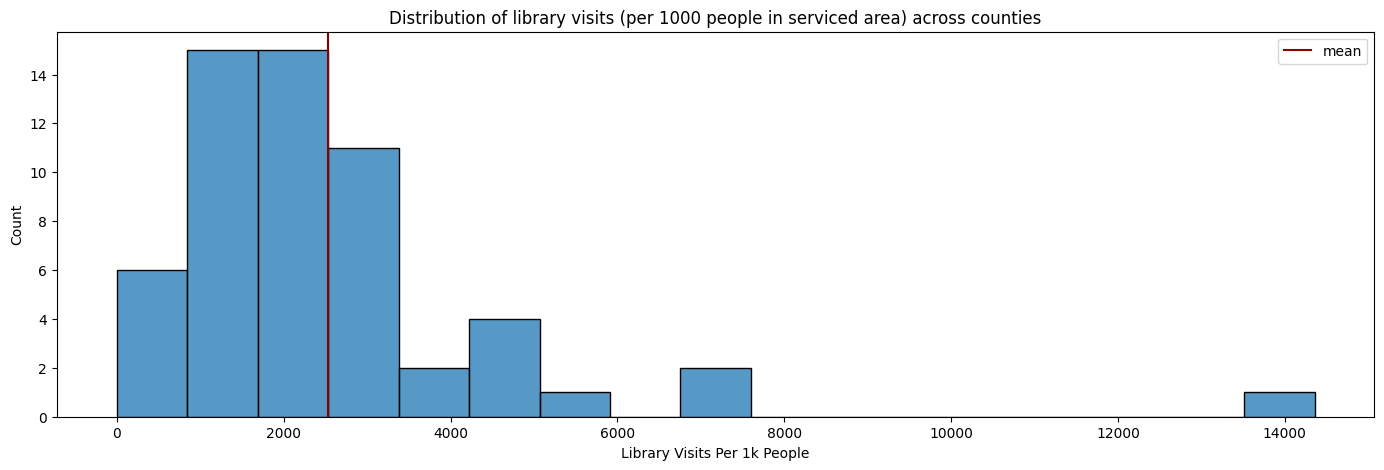

In [20]:
# Distribution of library visits (per 1000 people in serviced area) across counties
ax = sns.histplot(data=libraries_per[libraries_per['Library Visits Per 1k People'] >= 0].groupby('County').agg('mean'), x='Library Visits Per 1k People')
ax.set_title('Distribution of library visits (per 1000 people in serviced area) across counties')
ax.axvline(libraries_per[libraries_per['Library Visits Per 1k People'] >= 0].groupby('County').agg('mean')['Library Visits Per 1k People'].mean(), color='darkred', label='mean')
ax.legend()
plt.show()

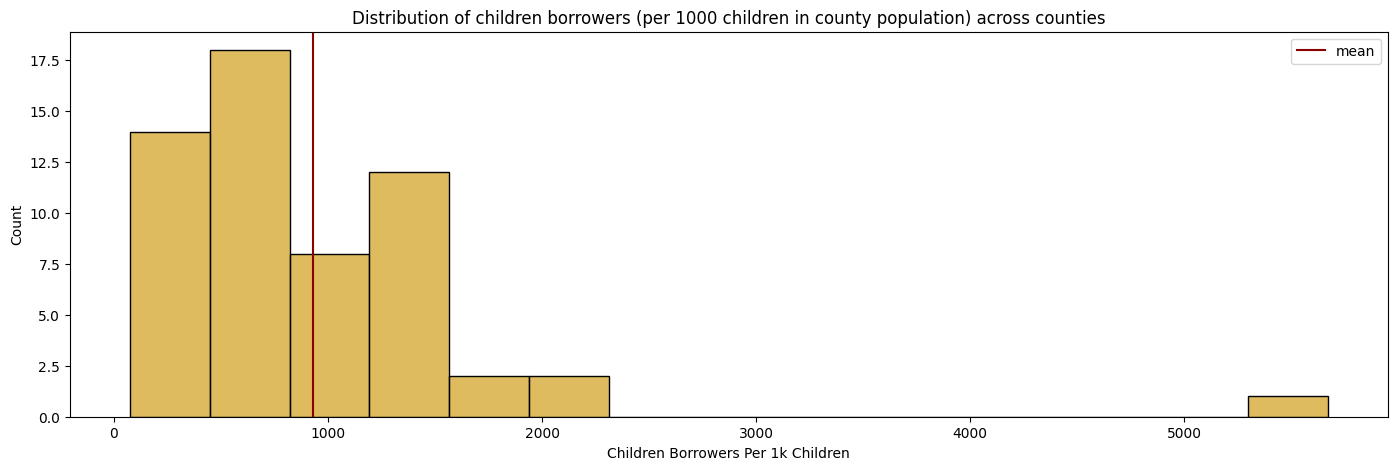

In [21]:
# Distribution of children borrowers (per 1000 children in county population) across counties
ax = sns.histplot(data=libraries_per[libraries_per['Children Borrowers Per 1k Children'] >= 0].groupby('County').agg('mean'), x='Children Borrowers Per 1k Children', color='#d5a42b')
ax.set_title('Distribution of children borrowers (per 1000 children in county population) across counties')
ax.axvline(libraries_per[libraries_per['Children Borrowers Per 1k Children'] >= 0].groupby('County').agg('mean')['Children Borrowers Per 1k Children'].mean(), color='darkred', label='mean')
ax.legend()
plt.show()

In [22]:
# DISTRIBUTIONS OF PERCENT MET, EXCEEDED, NEARLY MET, NOT MET PER GRADE

In [23]:
# Create new dataframes for every year's library activity and test performance to graph correlation
year_dfs = {}
for i in range (2017, 2023):
    if i==2020: # skip 2020
        continue
    year_dfs[f"{i}"] = pd.DataFrame({'CircChildrensMaterials': libraries_per[libraries_per['Year']==i]['Circ. Childrens Materials Per 1k Children'].reset_index(drop=True),
                        'ChildBorrowers': libraries_per[libraries_per['Year']==i]['Children Borrowers Per 1k Children'].reset_index(drop=True),
                        'ChildPrograms': libraries_per[libraries_per['Year']==i]["Children's Programs per 1k Children"].reset_index(drop=True),
                        'PrgmAttendance': libraries_per[libraries_per['Year']==i]["Children's Program Attendance Per 1k Children"].reset_index(drop=True)})
    for j in range (3, 9):
        year_dfs[f"{i}"][f"PctExceededELA_{j}"] = caaspp[(caaspp['Test Year']==i) & (caaspp['Grade']==j)]['Percent Exceeded ELA'].reset_index(drop=True)
        year_dfs[f"{i}"][f"PctExceededMath_{j}"] = caaspp[(caaspp['Test Year']==i) & (caaspp['Grade']==j)]['Percent Exceeded Math'].reset_index(drop=True)
        year_dfs[f"{i}"][f"PctMetELA_{j}"] = caaspp[(caaspp['Test Year']==i) & (caaspp['Grade']==j)]['Percent Met ELA'].reset_index(drop=True)
        year_dfs[f"{i}"][f"PctMetMath_{j}"] = caaspp[(caaspp['Test Year']==i) & (caaspp['Grade']==j)]['Percent Met Math'].reset_index(drop=True)
        year_dfs[f"{i}"][f"PctNearELA_{j}"] = caaspp[(caaspp['Test Year']==i) & (caaspp['Grade']==j)]['Percent Nearly Met ELA'].reset_index(drop=True)
        year_dfs[f"{i}"][f"PctNearMath_{j}"] = caaspp[(caaspp['Test Year']==i) & (caaspp['Grade']==j)]['Percent Nearly Met Math'].reset_index(drop=True)
        year_dfs[f"{i}"][f"PctNotELA_{j}"] = caaspp[(caaspp['Test Year']==i) & (caaspp['Grade']==j)]['Percent Not Met ELA'].reset_index(drop=True)
        year_dfs[f"{i}"][f"PctNotMath_{j}"] = caaspp[(caaspp['Test Year']==i) & (caaspp['Grade']==j)]['Percent Not Met Math'].reset_index(drop=True)

df_2017 = year_dfs['2017']
df_2018 = year_dfs['2018']
df_2019 = year_dfs['2019']
df_2021 = year_dfs['2021']
df_2022 = year_dfs['2022']
del year_dfs

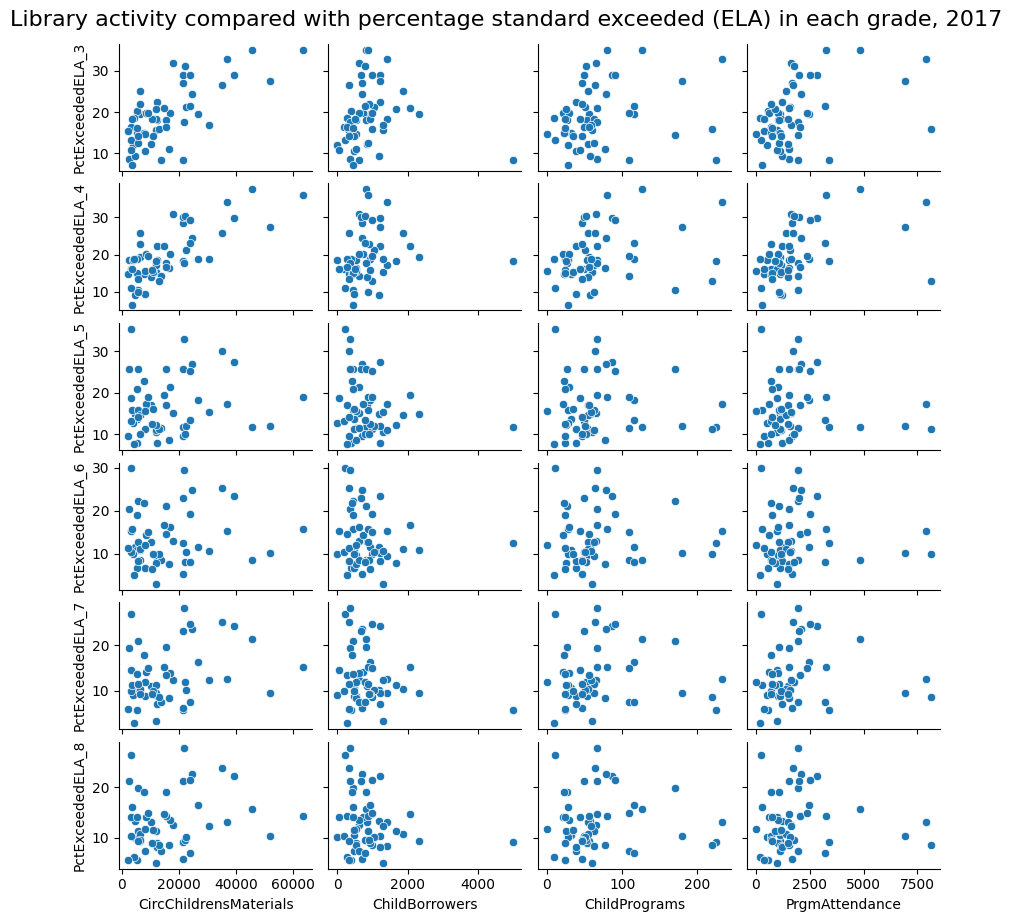

In [24]:
# pairplot ELA 2017
x_vars = ['CircChildrensMaterials', 'ChildBorrowers', 'ChildPrograms', 'PrgmAttendance']
sns.pairplot(df_2017, x_vars=x_vars, y_vars=['PctExceededELA_3', 'PctExceededELA_4', 'PctExceededELA_5', 'PctExceededELA_6', 'PctExceededELA_7', 'PctExceededELA_8'], height=1.5, aspect=1.5);
plt.suptitle("Library activity compared with percentage standard exceeded (ELA) in each grade, 2017", y=1.02, fontsize=16);

In [25]:
# linear regression 
outcome, predictors = patsy.dmatrices('PctExceededELA_3 ~ CircChildrensMaterials', df_2017)
model = sm.OLS(outcome, predictors)
# fit the model
results = model.fit()
# look at the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       PctExceededELA_3   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     53.93
Date:                Thu, 14 Mar 2024   Prob (F-statistic):           1.03e-09
Time:                        14:42:12   Log-Likelihood:                -171.74
No. Observations:                  57   AIC:                             347.5
Df Residuals:                      55   BIC:                             351.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 13

In [26]:
# t-test this is probably wrong ....
group1 = df_2017['CircChildrensMaterials']
group2 = df_2017['PctExceededELA_3']
ttest_ind(group1, group2)

Ttest_indResult(statistic=8.954793208103867, pvalue=8.481981516188437e-15)

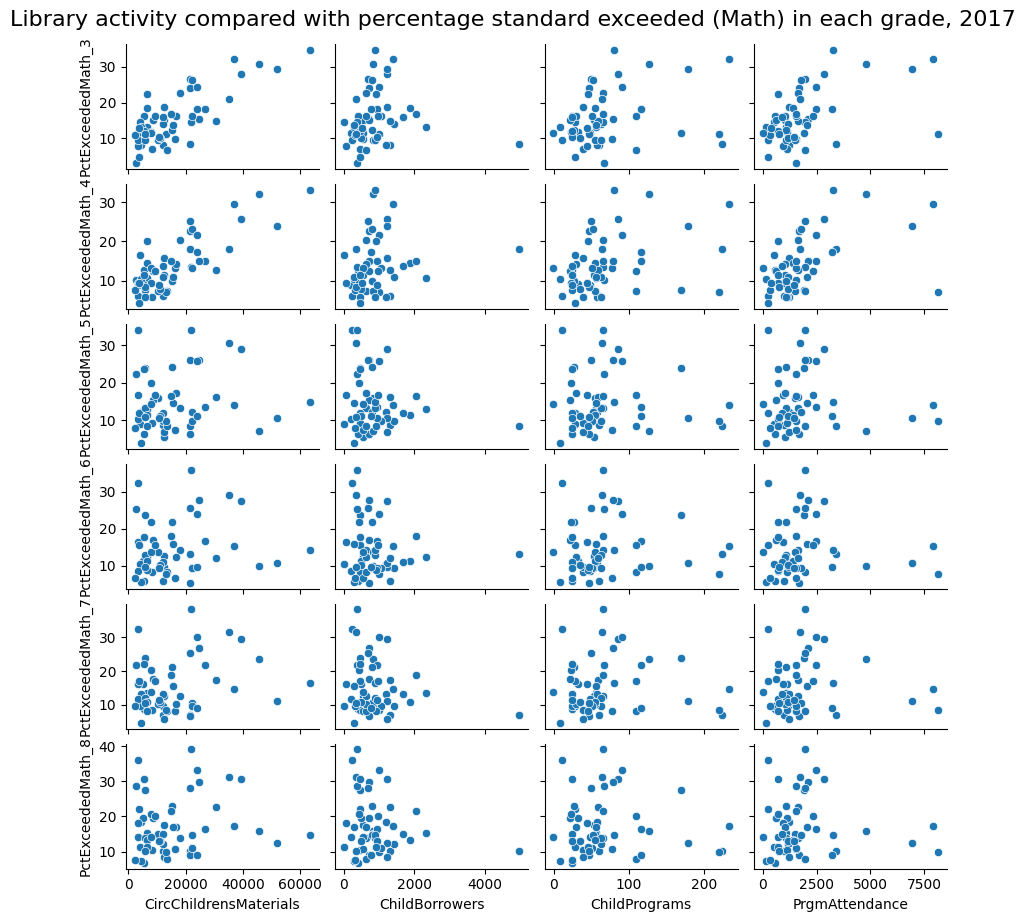

In [27]:
# pairplot math 2017
sns.pairplot(df_2017, x_vars=x_vars, y_vars=['PctExceededMath_3', 'PctExceededMath_4', 'PctExceededMath_5', 'PctExceededMath_6', 'PctExceededMath_7', 'PctExceededMath_8'], height=1.5, aspect=1.5);
plt.suptitle("Library activity compared with percentage standard exceeded (Math) in each grade, 2017", y=1.02, fontsize=16);

In [28]:
outcome, predictors = patsy.dmatrices('PctExceededMath_3 ~ CircChildrensMaterials', df_2017)
model = sm.OLS(outcome, predictors)
# fit the model
results = model.fit()
# look at the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      PctExceededMath_3   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     86.47
Date:                Thu, 14 Mar 2024   Prob (F-statistic):           7.06e-13
Time:                        14:42:15   Log-Likelihood:                -165.15
No. Observations:                  57   AIC:                             334.3
Df Residuals:                      55   BIC:                             338.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  8

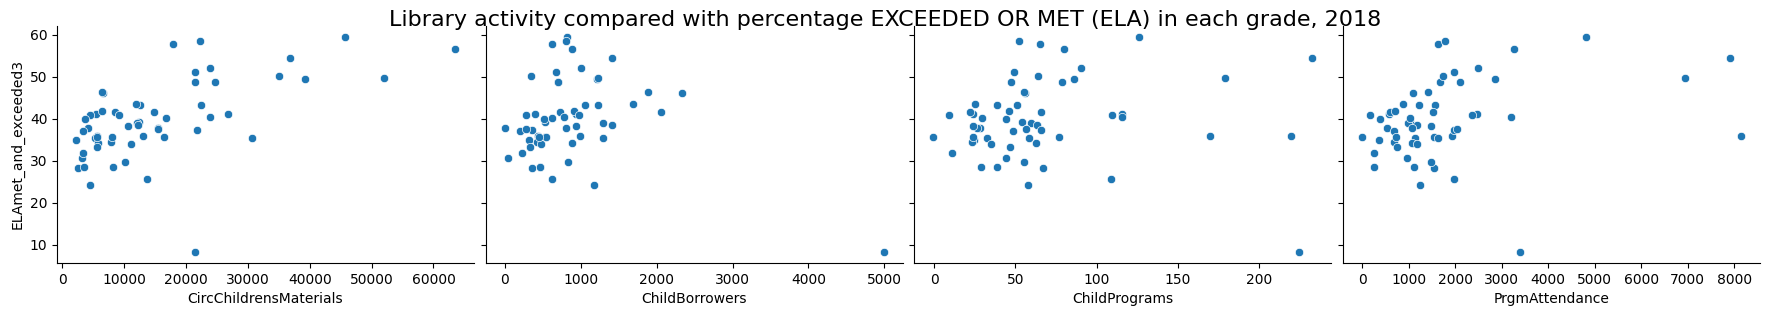

In [29]:
# met and exceeded (testing)
df_2017['ELAmet_and_exceeded3'] = df_2017['PctExceededELA_3'] + df_2017['PctMetELA_3']
sns.pairplot(df_2017, x_vars=x_vars, y_vars=['ELAmet_and_exceeded3'], height=3, aspect=1.5);
plt.suptitle("Library activity compared with percentage EXCEEDED OR MET (ELA) in each grade, 2018", y=1.02, fontsize=16);

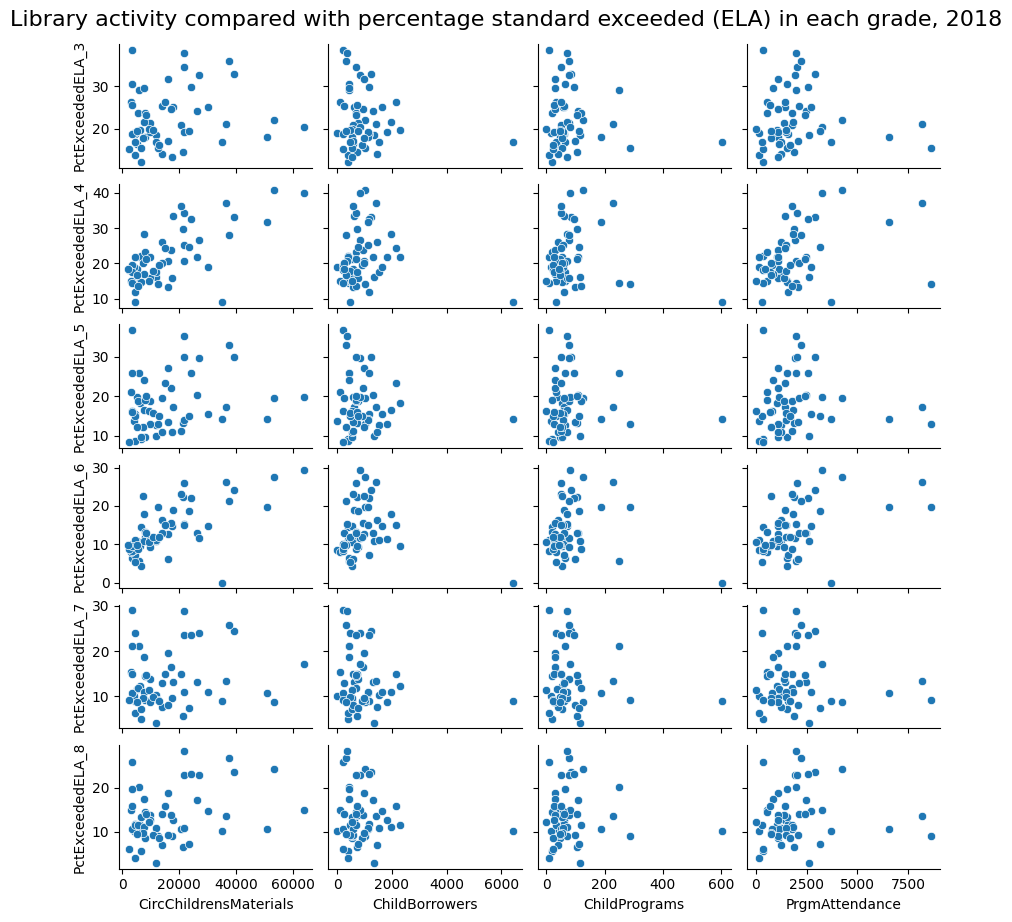

In [30]:
# 2018 ELA
sns.pairplot(df_2018, x_vars=x_vars, y_vars=['PctExceededELA_3', 'PctExceededELA_4', 'PctExceededELA_5', 'PctExceededELA_6', 'PctExceededELA_7', 'PctExceededELA_8'], height=1.5, aspect=1.5);
plt.suptitle("Library activity compared with percentage standard exceeded (ELA) in each grade, 2018", y=1.02, fontsize=16);

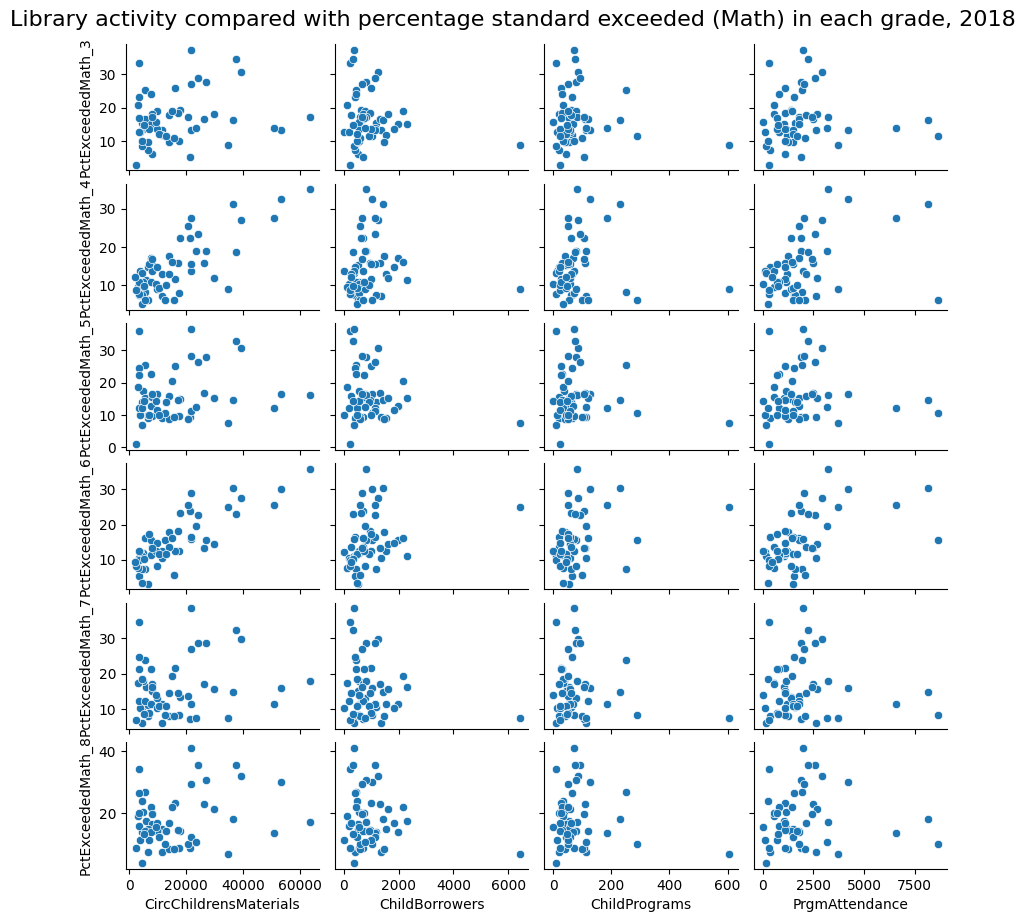

In [31]:
# 2018 math
sns.pairplot(df_2018, x_vars=x_vars, y_vars=['PctExceededMath_3', 'PctExceededMath_4', 'PctExceededMath_5', 'PctExceededMath_6', 'PctExceededMath_7', 'PctExceededMath_8'], height=1.5, aspect=1.5);
plt.suptitle("Library activity compared with percentage standard exceeded (Math) in each grade, 2018", y=1.02, fontsize=16);

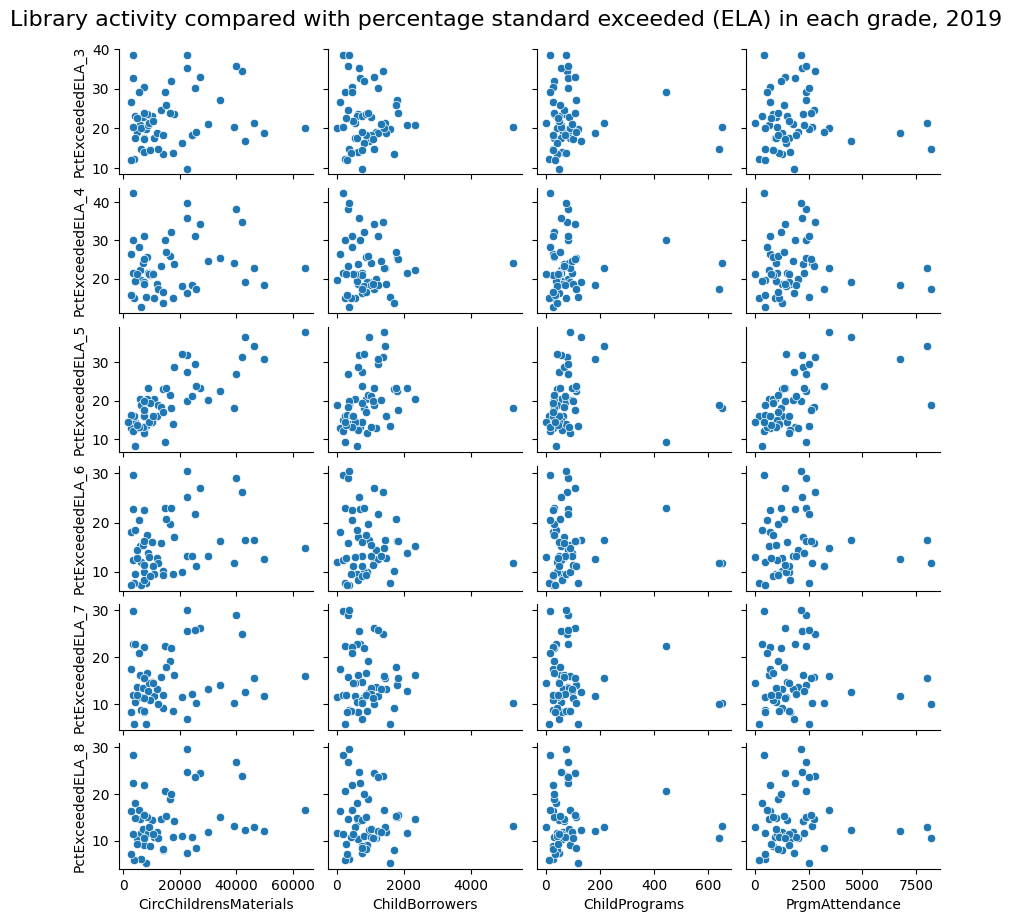

In [32]:
# 2019 ELA
sns.pairplot(df_2019, x_vars=x_vars, y_vars=['PctExceededELA_3', 'PctExceededELA_4', 'PctExceededELA_5', 'PctExceededELA_6', 'PctExceededELA_7', 'PctExceededELA_8'], height=1.5, aspect=1.5);
plt.suptitle("Library activity compared with percentage standard exceeded (ELA) in each grade, 2019", y=1.02, fontsize=16);

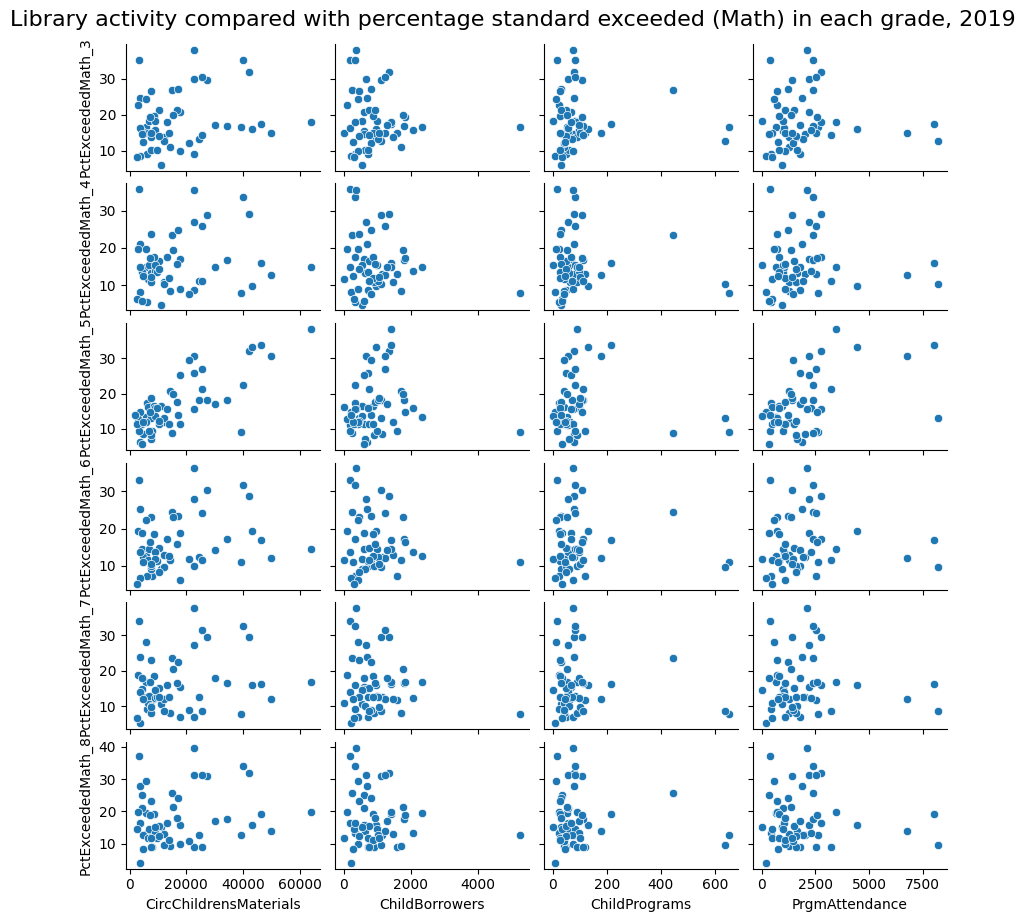

In [33]:
# 2019 math
sns.pairplot(df_2019, x_vars=x_vars, y_vars=['PctExceededMath_3', 'PctExceededMath_4', 'PctExceededMath_5', 'PctExceededMath_6', 'PctExceededMath_7', 'PctExceededMath_8'], height=1.5, aspect=1.5);
plt.suptitle("Library activity compared with percentage standard exceeded (Math) in each grade, 2019", y=1.02, fontsize=16);

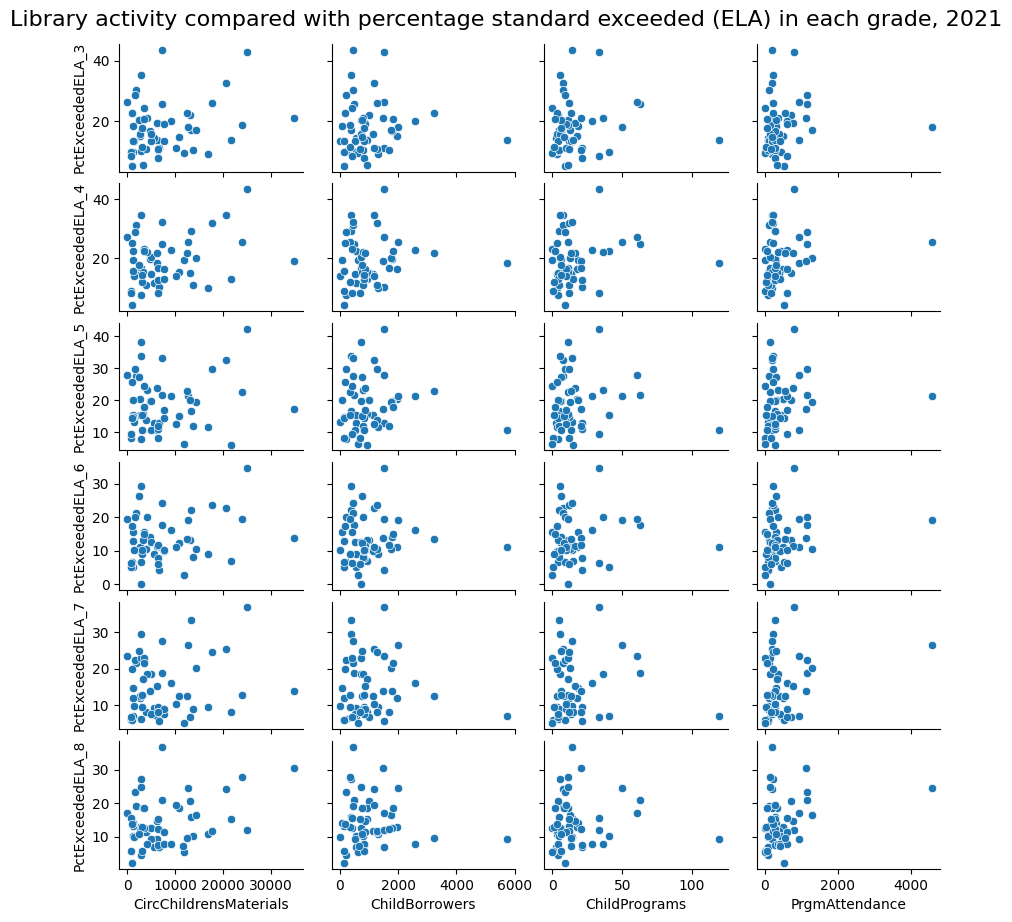

In [34]:
# 2021 ELA
sns.pairplot(df_2021, x_vars=x_vars, y_vars=['PctExceededELA_3', 'PctExceededELA_4', 'PctExceededELA_5', 'PctExceededELA_6', 'PctExceededELA_7', 'PctExceededELA_8'], height=1.5, aspect=1.5);
plt.suptitle("Library activity compared with percentage standard exceeded (ELA) in each grade, 2021", y=1.02, fontsize=16);

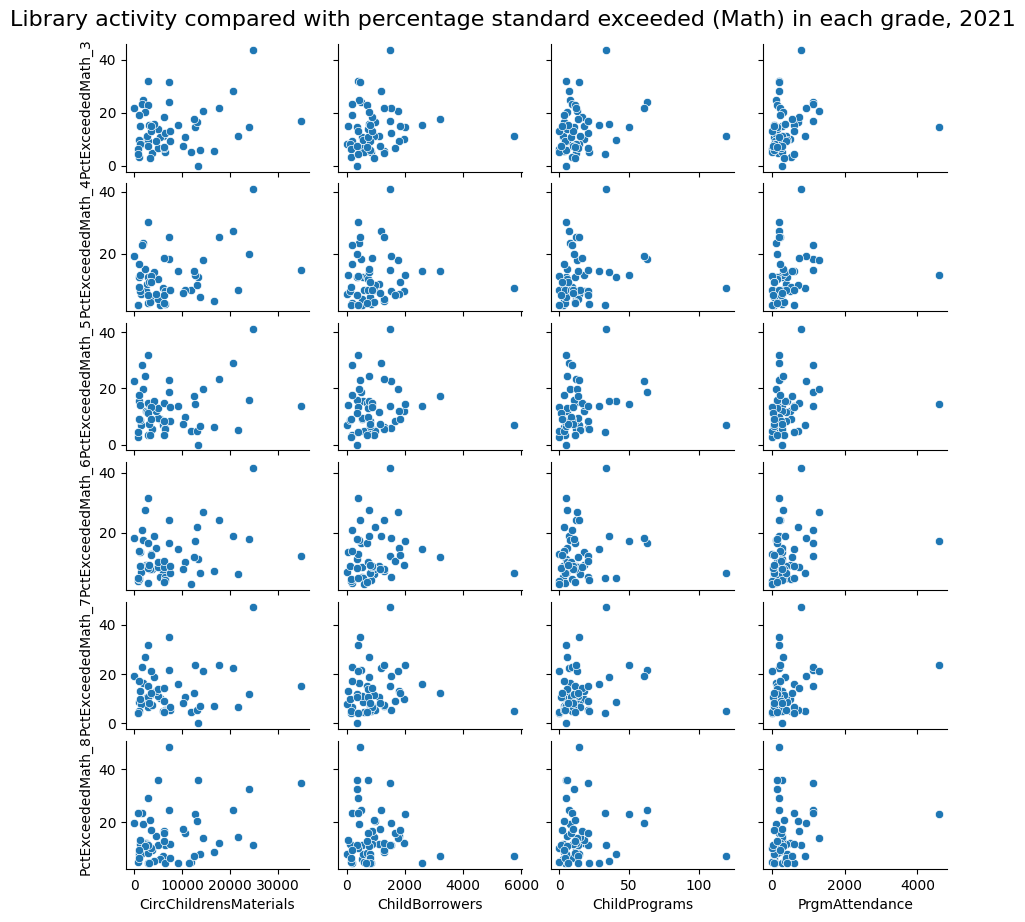

In [35]:
# 2021 math
sns.pairplot(df_2021, x_vars=x_vars, y_vars=['PctExceededMath_3', 'PctExceededMath_4', 'PctExceededMath_5', 'PctExceededMath_6', 'PctExceededMath_7', 'PctExceededMath_8'], height=1.5, aspect=1.5);
plt.suptitle("Library activity compared with percentage standard exceeded (Math) in each grade, 2021", y=1.02, fontsize=16);

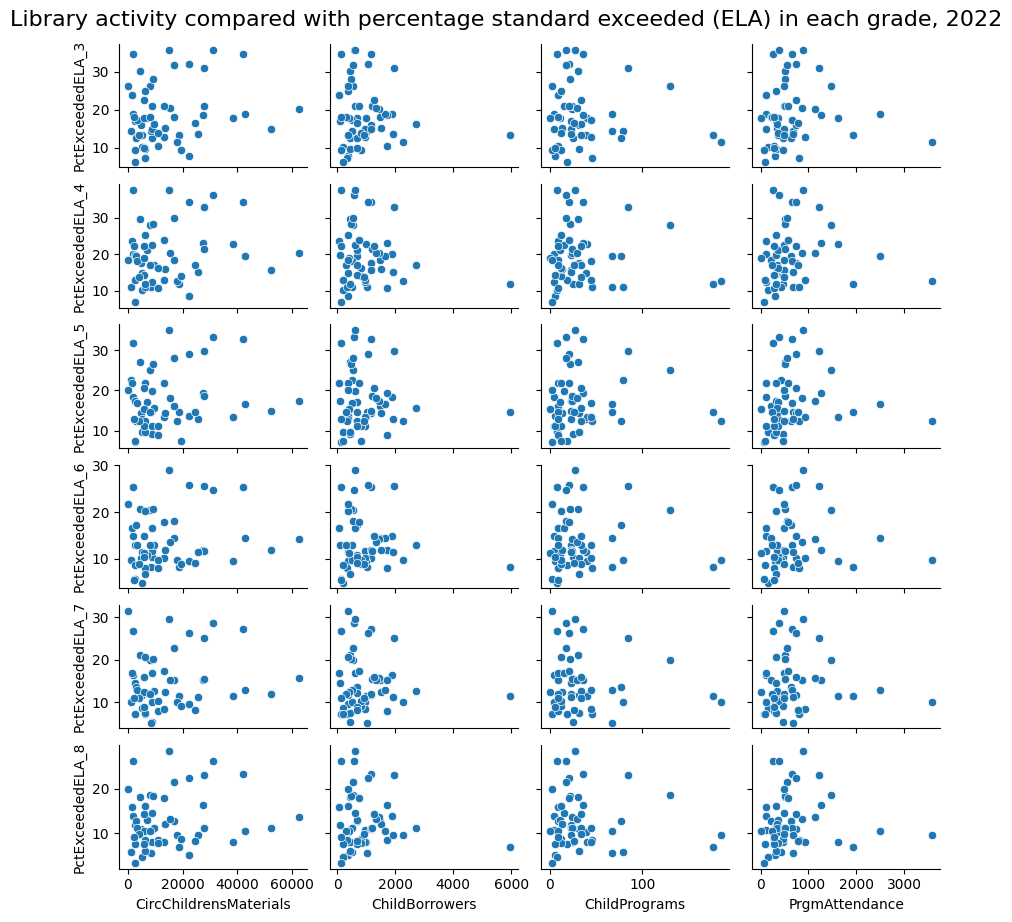

In [36]:
# 2022 ELA
sns.pairplot(df_2022, x_vars=x_vars, y_vars=['PctExceededELA_3', 'PctExceededELA_4', 'PctExceededELA_5', 'PctExceededELA_6', 'PctExceededELA_7', 'PctExceededELA_8'], height=1.5, aspect=1.5);
plt.suptitle("Library activity compared with percentage standard exceeded (ELA) in each grade, 2022", y=1.02, fontsize=16);

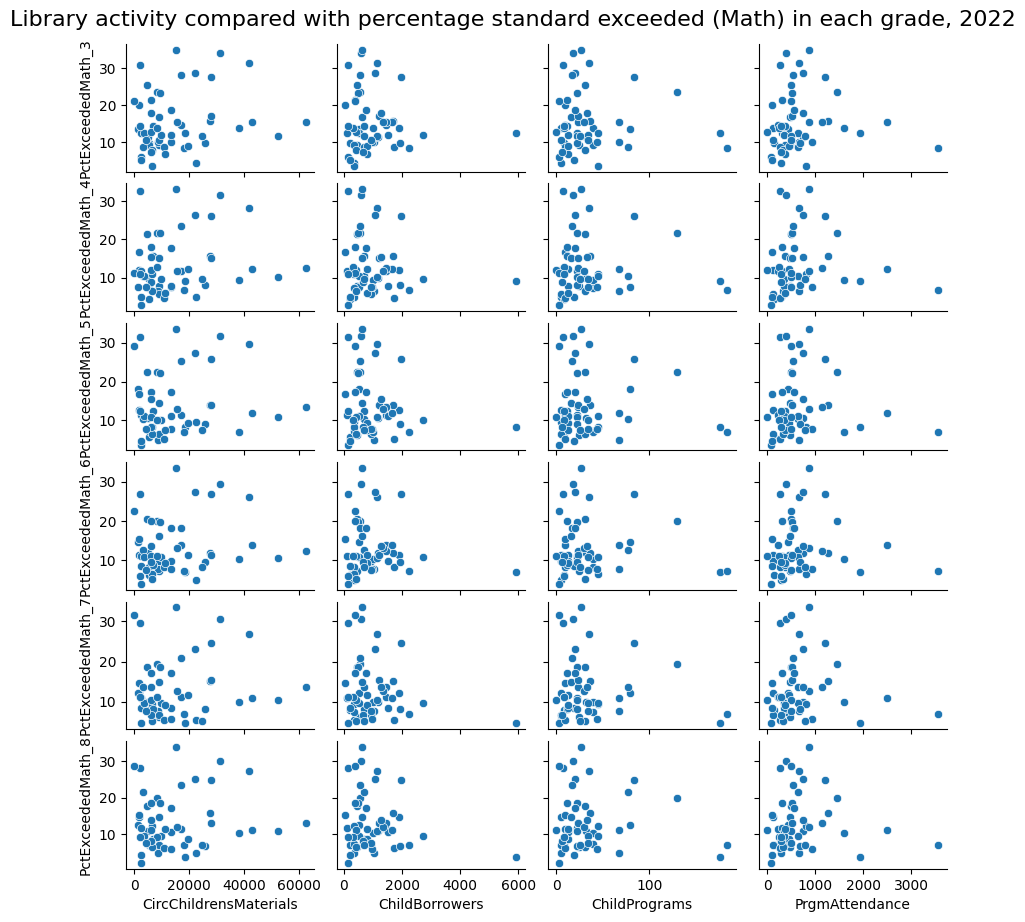

In [37]:
# 2022 math
sns.pairplot(df_2022, x_vars=x_vars, y_vars=['PctExceededMath_3', 'PctExceededMath_4', 'PctExceededMath_5', 'PctExceededMath_6', 'PctExceededMath_7', 'PctExceededMath_8'], height=1.5, aspect=1.5);
plt.suptitle("Library activity compared with percentage standard exceeded (Math) in each grade, 2022", y=1.02, fontsize=16);

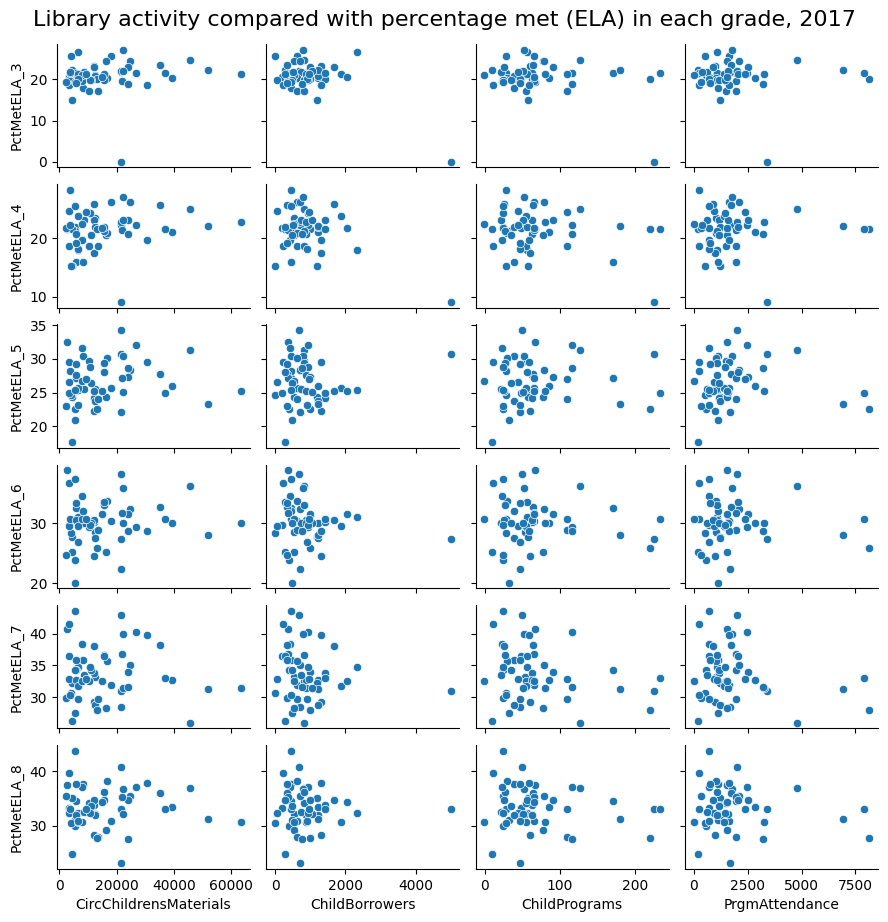

In [38]:
# x_vars vs percent met
sns.pairplot(df_2017, x_vars=x_vars, y_vars=['PctMetELA_3', 'PctMetELA_4', 'PctMetELA_5', 'PctMetELA_6', 'PctMetELA_7', 'PctMetELA_8'], height=1.5, aspect=1.5);
plt.suptitle("Library activity compared with percentage met (ELA) in each grade, 2017", y=1.02, fontsize=16);

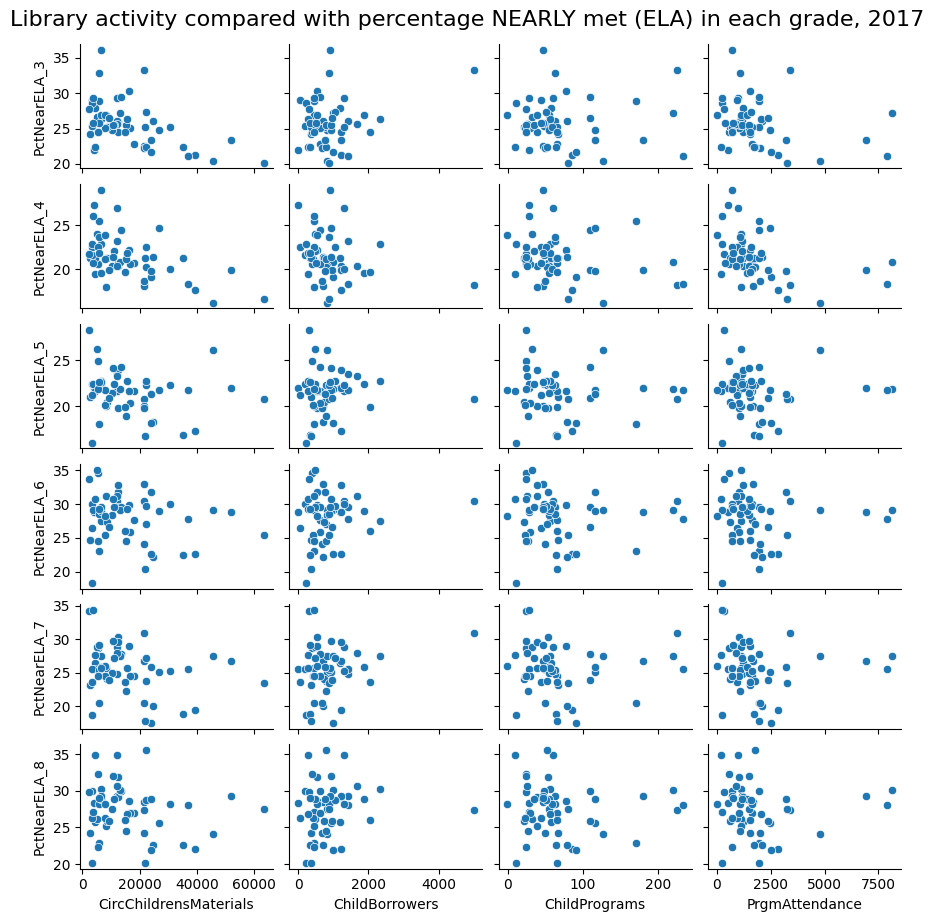

In [39]:
# x_vars vs percent nearly met
sns.pairplot(df_2017, x_vars=x_vars, y_vars=['PctNearELA_3', 'PctNearELA_4', 'PctNearELA_5', 'PctNearELA_6', 'PctNearELA_7', 'PctNearELA_8'], height=1.5, aspect=1.5);
plt.suptitle("Library activity compared with percentage NEARLY met (ELA) in each grade, 2017", y=1.02, fontsize=16);

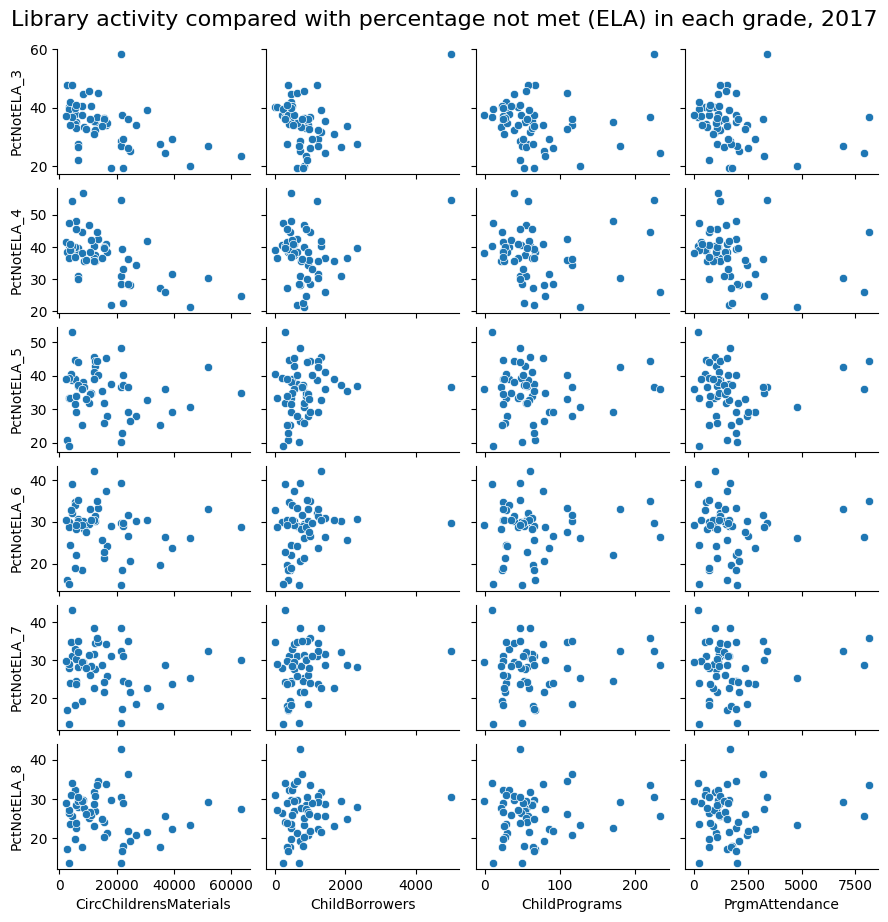

In [40]:
# x_vars vs percent not met
sns.pairplot(df_2017, x_vars=x_vars, y_vars=['PctNotELA_3', 'PctNotELA_4', 'PctNotELA_5', 'PctNotELA_6', 'PctNotELA_7', 'PctNotELA_8'], height=1.5, aspect=1.5);
plt.suptitle("Library activity compared with percentage not met (ELA) in each grade, 2017", y=1.02, fontsize=16);